In [6]:
import numpy as np
import shapely
import bisect
import shapely.wkt
import matplotlib.pyplot as plt
import math
import geopandas as gpd

In [7]:
# Geometries
geom1 = shapely.wkt.loads('POLYGON ((1.1 1.2, 1.4 5.1, 5.1 5.3, 3 2, 1.1 1.2))')
geom2 = shapely.wkt.loads('POLYGON ((0 0, 2 3, 2 4, 2 4, 2.1 2.5, 4 2, 2.1 2.1, 0 0))')
geom3 = shapely.wkt.loads('POLYGON ((-24.3 10.48, -19.32 12.44, -15.3 14.2, -15.3 13.78, -15.3 13.9, -15.06 10.4, -17.44 11.38, -19.18 11.46, -14.82 9.08, -12.9 10.14, -12.08 7.86, -14.36 5.94, -15.92 8.34, -16.86 3.48, -19.38 4.4, -18.2 6.52, -20.08 7.4, -24.34 6.68, -24.24 8.66, -27.52 11.1,  -27.0 11.1, -24.3 10.48))')
geom4 = shapely.wkt.loads('POLYGON ((-9.9 16.85, -5.95 17.67, -6.19 13.49, -9.81 12.74, -7.35 9.2, -6.82 6.19, -10 6, -12.36 5.75, -14.59 8.1, -12 10, -13.93 12.31, -17.35 12.45, -16.83 15.6, -20.45 14.6, -22.36 12, -22 9.37, -27.1 6.48, -30 11.7, -27.9 15.5, -21.46 17.26, -19.6 16.1, -14.77 17.6, -11.43 13.32, -9.9 16.85))')

geom_pairs = []
file = open('data/intersection/manual', 'r')

lines = file.read().splitlines()
for i in range(0, len(lines), 3): # Don't include a new line in end of file
    p1 = shapely.from_wkt(lines[i])
    p2 = shapely.from_wkt(lines[i + 1])
    geom_pairs.append((p1, p2))

#print(geom_pairs)

In [8]:
SHOW_COORDINATES = True
SHOW_GEOMETRIES = True
SHOW_INTERSECTING_POINTS = True
SHOW_COMMON_BOUNDING_BOX = True
SHOW_BOUNDING_BOXES = True

In [9]:
import intersection.first_bin_search
import intersection.chunk_bbox_intersection
binary_intersection = intersection.first_bin_search.binary_intersection
chunk_bbox_is_intersecting = intersection.chunk_bbox_intersection.is_intersecting

from intersection.plotting import *

from algos.alg_fpd_extended import FpdExtended
fpd = FpdExtended()

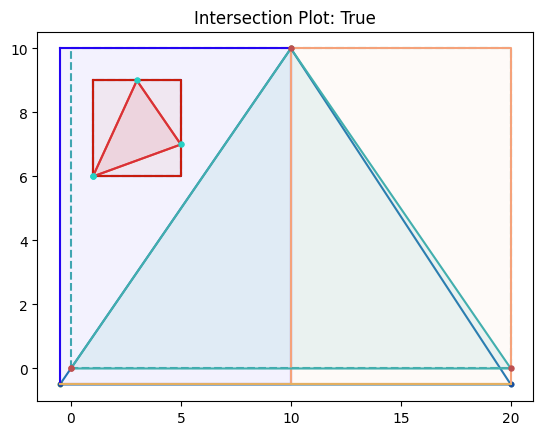

Above FAILED!


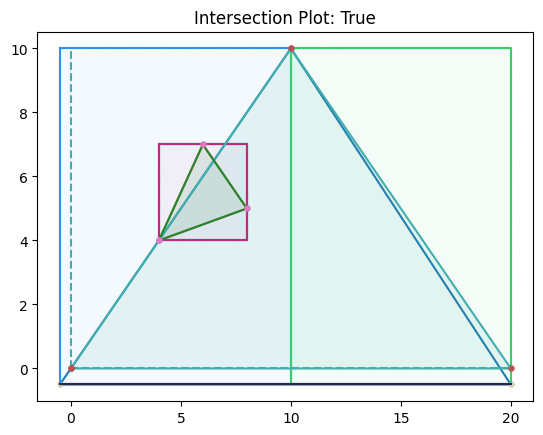

Passed!


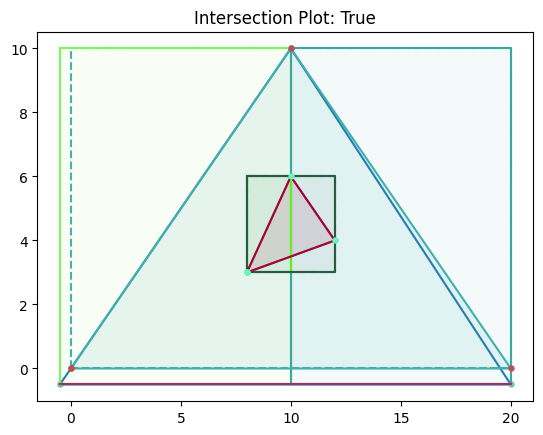

Passed!


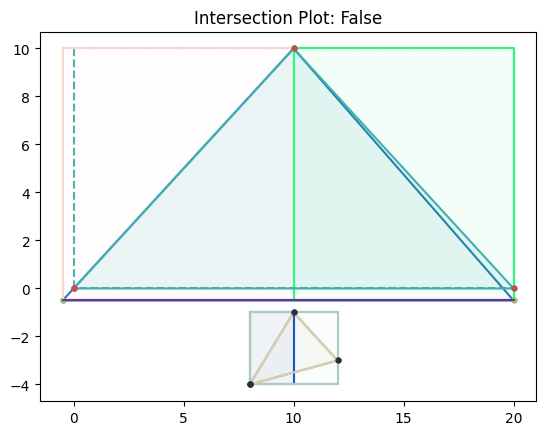

Passed!


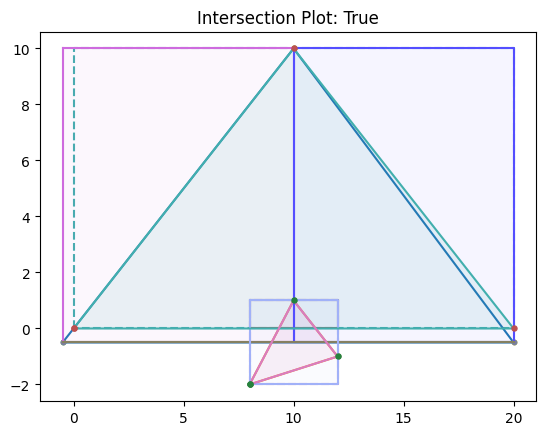

Passed!


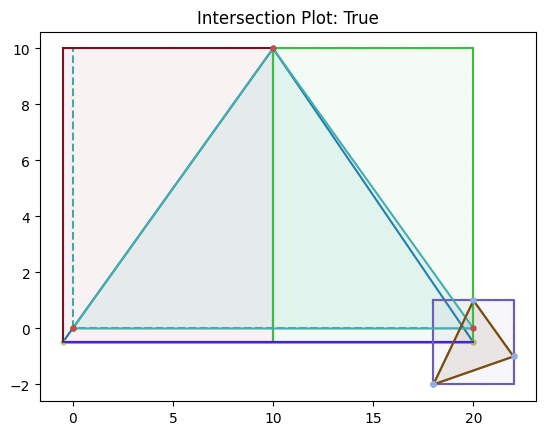

Passed!


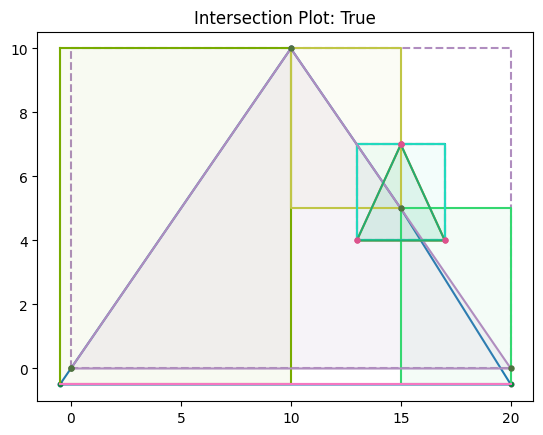

Passed!


In [11]:
for g1, g2 in geom_pairs:
    #is_intersecting, intersect_points = binary_intersection(g1, g2)

    _, b1 = fpd.compress(g1)
    _, b2 = fpd.compress(g2)
    is_intersecting = chunk_bbox_is_intersecting((b1, b2))
    exp = shapely.intersects(g1, g2)

    plot_chunk_bounds(b1, True, avoid_show=False)
    plot_chunk_bounds(b2, True, avoid_show=False)
    
    geoms = (g1, g2)
    for g in geoms:
        plot_geometry(g, SHOW_GEOMETRIES)
        plot_geometry_bbox(g, SHOW_BOUNDING_BOXES)
        plot_coordinates(g, SHOW_COORDINATES)
    
    plot_common_bbox(geoms, SHOW_COMMON_BOUNDING_BOX)
    #plot_intersecting_points(intersect_points, legends, SHOW_INTERSECTING_POINTS)

    if SHOW_COORDINATES or SHOW_GEOMETRIES or SHOW_INTERSECTING_POINTS or SHOW_COMMON_BOUNDING_BOX or SHOW_BOUNDING_BOXES:
        plt.title("Intersection Plot: " + ('True' if is_intersecting else 'False'))
        plt.show()

    if is_intersecting != exp:
        print("Above FAILED!")
    else:
        print("Passed!")